<a href="https://colab.research.google.com/github/sans-mishra/email_spam_ham/blob/main/Email_spam_ham_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Retrieval


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
rawdata = open("/content/email_classification.csv").read()
rawdata[0:500]

"email,label\nUpgrade to our premium plan for exclusive access to premium content and features.,ham\nHappy holidays from our team! Wishing you joy and prosperity this season.,ham\nWe're hiring! Check out our career opportunities and join our dynamic team.,ham\nYour Amazon account has been locked. Click here to verify your account information.,spam\nYour opinion matters! Take our survey and help us enhance your experience.,ham\nYour payment has been received. Thank you for your prompt transaction.,ham\nY"

In [ ]:
data = pd.read_csv("email_classification.csv")
data.head()

,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham
3,Your Amazon account has been locked. Click her...,spam
4,Your opinion matters! Take our survey and help...,ham


# Pre Processing

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#Removing Punctuation
import string

def remove_punc(text):
    new_text = "".join([char for char in text if char not in string.punctuation])
    return new_text

data["text_clean"] = data["email"].apply(lambda x: remove_punc(x))

data.head()

,email,label,text_clean
0,Upgrade to our premium plan for exclusive acce...,ham,Upgrade to our premium plan for exclusive acce...
1,Happy holidays from our team! Wishing you joy ...,ham,Happy holidays from our team Wishing you joy a...
2,We're hiring! Check out our career opportuniti...,ham,Were hiring Check out our career opportunities...
3,Your Amazon account has been locked. Click her...,spam,Your Amazon account has been locked Click here...
4,Your opinion matters! Take our survey and help...,ham,Your opinion matters Take our survey and help ...


In [ ]:
#Tokenization
import re
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data["text_tokenized"] = data["text_clean"].apply(lambda x: tokenize(x))

data.head()

,email,label,text_clean,text_tokenized
0,Upgrade to our premium plan for exclusive acce...,ham,Upgrade to our premium plan for exclusive acce...,"[Upgrade, to, our, premium, plan, for, exclusi..."
1,Happy holidays from our team! Wishing you joy ...,ham,Happy holidays from our team Wishing you joy a...,"[Happy, holidays, from, our, team, Wishing, yo..."
2,We're hiring! Check out our career opportuniti...,ham,Were hiring Check out our career opportunities...,"[Were, hiring, Check, out, our, career, opport..."
3,Your Amazon account has been locked. Click her...,spam,Your Amazon account has been locked Click here...,"[Your, Amazon, account, has, been, locked, Cli..."
4,Your opinion matters! Take our survey and help...,ham,Your opinion matters Take our survey and help ...,"[Your, opinion, matters, Take, our, survey, an..."


In [ ]:
#Removing stopwards
import nltk
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

data["text_nostop"] = data["text_tokenized"].apply(lambda x: remove_stopwords(x))

data.head()

,email,label,text_clean,text_tokenized,text_nostop
0,Upgrade to our premium plan for exclusive acce...,ham,Upgrade to our premium plan for exclusive acce...,"[Upgrade, to, our, premium, plan, for, exclusi...","[Upgrade, premium, plan, exclusive, access, pr..."
1,Happy holidays from our team! Wishing you joy ...,ham,Happy holidays from our team Wishing you joy a...,"[Happy, holidays, from, our, team, Wishing, yo...","[Happy, holidays, team, Wishing, joy, prosperi..."
2,We're hiring! Check out our career opportuniti...,ham,Were hiring Check out our career opportunities...,"[Were, hiring, Check, out, our, career, opport...","[Were, hiring, Check, career, opportunities, j..."
3,Your Amazon account has been locked. Click her...,spam,Your Amazon account has been locked Click here...,"[Your, Amazon, account, has, been, locked, Cli...","[Your, Amazon, account, locked, Click, verify,..."
4,Your opinion matters! Take our survey and help...,ham,Your opinion matters Take our survey and help ...,"[Your, opinion, matters, Take, our, survey, an...","[Your, opinion, matters, Take, survey, help, u..."


In [ ]:
#Stemming
stemmed = nltk.PorterStemmer()

def stemming(text):
    text = [stemmed.stem(word) for word in text]
    return text

data["text_stemmed"] = data["text_nostop"].apply(lambda x: stemming(x))

data.head()

,email,label,text_clean,text_tokenized,text_nostop,text_stemmed
0,Upgrade to our premium plan for exclusive acce...,ham,Upgrade to our premium plan for exclusive acce...,"[Upgrade, to, our, premium, plan, for, exclusi...","[Upgrade, premium, plan, exclusive, access, pr...","[upgrad, premium, plan, exclus, access, premiu..."
1,Happy holidays from our team! Wishing you joy ...,ham,Happy holidays from our team Wishing you joy a...,"[Happy, holidays, from, our, team, Wishing, yo...","[Happy, holidays, team, Wishing, joy, prosperi...","[happi, holiday, team, wish, joy, prosper, sea..."
2,We're hiring! Check out our career opportuniti...,ham,Were hiring Check out our career opportunities...,"[Were, hiring, Check, out, our, career, opport...","[Were, hiring, Check, career, opportunities, j...","[were, hire, check, career, opportun, join, dy..."
3,Your Amazon account has been locked. Click her...,spam,Your Amazon account has been locked Click here...,"[Your, Amazon, account, has, been, locked, Cli...","[Your, Amazon, account, locked, Click, verify,...","[your, amazon, account, lock, click, verifi, a..."
4,Your opinion matters! Take our survey and help...,ham,Your opinion matters Take our survey and help ...,"[Your, opinion, matters, Take, our, survey, an...","[Your, opinion, matters, Take, survey, help, u...","[your, opinion, matter, take, survey, help, us..."


In [ ]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text


# Vectorization

In [ ]:
#TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf.fit_transform(data["email"])
print(X_tfidf.shape)
print(tfidf.get_feature_names_out())

(179, 453)
['50' 'access' 'account' 'achieve' 'achievement' 'achievements' 'act'
 'activate' 'activity' 'added' 'advance' 'affiliate' 'always' 'amazon'
 'anniversary' 'announce' 'annual' 'another' 'antivirus' 'anything'
 'anytime' 'app' 'appeal' 'apply' 'appreciate' 'appreciation' 'asap'
 'assist' 'assistance' 'attached' 'attending' 'await' 'back' 'balance'
 'ban' 'bank' 'banned' 'based' 'benefits' 'better' 'big' 'blog' 'bonus'
 'browsing' 'business' 'buy' 'call' 'car' 'card' 'career' 'careers' 'cash'
 'celebrating' 'chance' 'change' 'changing' 'channels' 'charged' 'charges'
 'chat' 'check' 'chosen' 'claim' 'click' 'club' 'code' 'collaborations'
 'collection' 'committed' 'company' 'compromised' 'computer' 'concerns'
 'confirm' 'confirmation' 'confirmed' 'congratulations' 'connected'
 'contact' 'content' 'continue' 'continued' 'credit' 'credited' 'cruise'
 'current' 'customer' 'daily' 'day' 'days' 'dear' 'delivered' 'delivery'
 'demand' 'designer' 'details' 'detected' 'difference' 'diff

In [ ]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,443,444,445,446,447,448,449,450,451,452
0,0.0,0.296138,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.0,0.000000,0.463802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
5,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
6,0.0,0.000000,0.477097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
7,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
8,0.0,0.000000,0.239865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
9,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30929


##Model Training

### Train Test Split

In [ ]:
import string

data['body_len'] = data['email'].apply(lambda x: len(x) - x.count(" "))
data.head()

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['email'].apply(lambda x: count_punct(x))
data.head()

,email,label,text_clean,text_tokenized,text_nostop,text_stemmed,body_len,punct%
0,Upgrade to our premium plan for exclusive acce...,ham,Upgrade to our premium plan for exclusive acce...,"[Upgrade, to, our, premium, plan, for, exclusi...","[Upgrade, premium, plan, exclusive, access, pr...","[upgrad, premium, plan, exclus, access, premiu...",69,1.4
1,Happy holidays from our team! Wishing you joy ...,ham,Happy holidays from our team Wishing you joy a...,"[Happy, holidays, from, our, team, Wishing, yo...","[Happy, holidays, team, Wishing, joy, prosperi...","[happi, holiday, team, wish, joy, prosper, sea...",62,3.2
2,We're hiring! Check out our career opportuniti...,ham,Were hiring Check out our career opportunities...,"[Were, hiring, Check, out, our, career, opport...","[Were, hiring, Check, career, opportunities, j...","[were, hire, check, career, opportun, join, dy...",64,4.7
3,Your Amazon account has been locked. Click her...,spam,Your Amazon account has been locked Click here...,"[Your, Amazon, account, has, been, locked, Cli...","[Your, Amazon, account, locked, Click, verify,...","[your, amazon, account, lock, click, verifi, a...",71,2.8
4,Your opinion matters! Take our survey and help...,ham,Your opinion matters Take our survey and help ...,"[Your, opinion, matters, Take, our, survey, an...","[Your, opinion, matters, Take, survey, help, u...","[your, opinion, matter, take, survey, help, us...",63,3.2


In [ ]:
from sklearn.model_selection import train_test_split

X=data[['email', 'body_len', 'punct%']]
y=data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (143, 3)
y_train shape: (143,)
X_test shape: (36, 3)
y_test shape: (36,)


In [ ]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['email'])

tfidf_train = tfidf_vect_fit.transform(X_train['email'])
tfidf_test = tfidf_vect_fit.transform(X_test['email'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True),
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True),
           pd.DataFrame(tfidf_test.toarray())], axis=1)
X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,409,410,411,412,413,414,415,416,417,418
0,77,3.9,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.355137,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,49,4.1,0.0,0.0,0.280824,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,47,8.5,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.452828,0.000000
3,74,4.1,0.0,0.0,0.000000,0.0,0.0,0.0,0.451675,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.288268
4,55,5.5,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=-1)
model.fit(X_train_vect, y_train)

y_pred = model.predict(X_test_vect)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [ ]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
print('precision: {} / Recall: {}'.format(precision, recall))

precision: 1.0 / Recall: 1.0


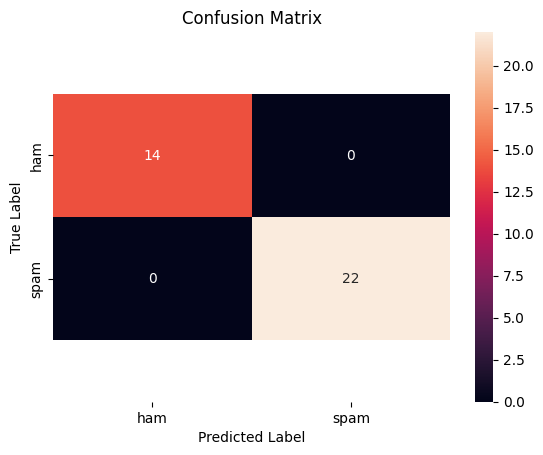

a


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sns.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print('a')

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00        14
        spam       1.00      1.00      1.00        22

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

